In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Import API key
from api_keys import weather_api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

In [8]:
#create lists for temp, humidity, cloudiness, and wind speed to create dataframe of city data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

temp = []
humidity = []
cloud = []
windspd = []
lat = []
lon = []


In [9]:
for city in cities:
    response = requests.get(query_url + city).json()
    index = cities.index(city)
    print(f"Processing Record {index} | {city}")
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspd.append(response['wind']['speed'])
    except:
        print("We can't find this city")
        lat.append("NA")
        lon.append("NA")
        temp.append("NA")
        humidity.append("NA")
        cloud.append("NA")
        windspd.append("NA")
        pass


Processing Record 0 | duku
Processing Record 1 | ushuaia
Processing Record 2 | karratha
Processing Record 3 | rikitea
Processing Record 4 | atuona
Processing Record 5 | mataura
Processing Record 6 | lompoc
Processing Record 7 | illoqqortoormiut
We can't find this city
Processing Record 8 | vaini
Processing Record 9 | diffa
Processing Record 10 | zhezkazgan
Processing Record 11 | punta arenas
Processing Record 12 | chalchihuites
Processing Record 13 | ponta do sol
Processing Record 14 | butaritari
Processing Record 15 | astoria
Processing Record 16 | lagoa
Processing Record 17 | bredasdorp
Processing Record 18 | altar
Processing Record 19 | tirumullaivasal
Processing Record 20 | hampden
Processing Record 21 | kapaa
Processing Record 22 | avarua
Processing Record 23 | khatanga
Processing Record 24 | belushya guba
We can't find this city
Processing Record 25 | vestmannaeyjar
Processing Record 26 | new norfolk
Processing Record 27 | barentsburg
We can't find this city
Processing Record 28 

Processing Record 237 | fukue
Processing Record 238 | vardo
Processing Record 239 | djibo
Processing Record 240 | puerto madero
Processing Record 241 | tambulan
We can't find this city
Processing Record 242 | kamyshevatskaya
Processing Record 243 | grand-lahou
Processing Record 244 | arraial do cabo
Processing Record 245 | neuquen
Processing Record 246 | berlevag
Processing Record 247 | sola
Processing Record 248 | iqaluit
Processing Record 249 | tuatapere
Processing Record 250 | moose factory
Processing Record 251 | constitucion
Processing Record 252 | nioro
Processing Record 253 | bhatkal
Processing Record 254 | pangnirtung
Processing Record 255 | touros
Processing Record 256 | muisne
Processing Record 257 | sorong
Processing Record 258 | qaqortoq
Processing Record 259 | yemelyanovo
Processing Record 260 | san patricio
Processing Record 261 | lakes entrance
Processing Record 262 | nuuk
Processing Record 263 | dakar
Processing Record 264 | lazaro cardenas
Processing Record 265 | guerr

Processing Record 471 | grand gaube
Processing Record 472 | thinadhoo
Processing Record 473 | aklavik
Processing Record 474 | guelengdeng
We can't find this city
Processing Record 475 | kargopol
Processing Record 476 | daniel flores
Processing Record 477 | flinders
Processing Record 478 | margate
Processing Record 479 | nishihara
Processing Record 480 | le port
Processing Record 481 | labutta
We can't find this city
Processing Record 482 | kidal
Processing Record 483 | zheleznodorozhnyy
Processing Record 484 | aflu
We can't find this city
Processing Record 485 | port hedland
Processing Record 486 | springbok
Processing Record 487 | jalu
Processing Record 488 | limbang
Processing Record 489 | caravelas
Processing Record 490 | mount gambier
Processing Record 491 | mumford
Processing Record 492 | sydney
Processing Record 493 | chimore
Processing Record 494 | krasnooktyabrskiy
Processing Record 495 | sao joaquim
Processing Record 496 | shu
Processing Record 497 | ulaangom
Processing Record

In [10]:
#create dataframe for city data
city_data = pd.DataFrame({"City":cities,
                         "Latitude": lat,
                         "Longitude": lon,
                         "Temperature": temp,
                         "Humidity": humidity,
                         "Cloudiness": cloud,
                         "Wind Speed": windspd})

city_data = city_data.loc[city_data["Latitude"]!= "NA"]

city_data.to_csv(output_data_file)         
city_data

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,duku,11.2361,4.9073,32.6,13,80,1.57
1,ushuaia,-54.8,-68.3,11,62,20,9.26
2,karratha,-20.7377,116.846,27.3,65,6,1.39
3,rikitea,-23.1203,-134.969,26.67,75,6,5.44
4,atuona,-9.8,-139.033,27.05,70,6,7.91
...,...,...,...,...,...,...,...
637,ouallam,14.3188,2.0866,31,11,0,6.1
638,rio grande,-32.035,-52.0986,22.89,73,40,4.12
639,pangai,-19.8,-174.35,29,79,20,1.54
640,impfondo,1.6381,18.0667,21,92,33,1.15


This plot displays the relationship between temperature and latitude. This plot shows that, in general, as we move further south of the equator, the temperature increases.


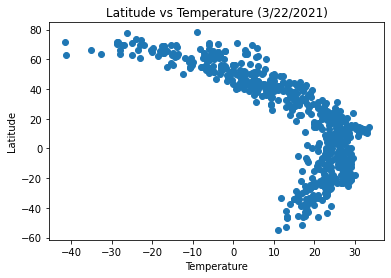

In [11]:
#Create Lat vs Temp scatter plot
lat_new = city_data["Latitude"]
temp_new = city_data["Temperature"]

plt.scatter(temp_new,lat_new)
plt.ylabel("Latitude")
plt.xlabel("Temperature")
plt.title("Latitude vs Temperature (3/22/2021)")
plt.savefig("Lat_Temp.png")

print("This plot displays the relationship between temperature and latitude. This plot shows that, in general, as we move further south of the equator, the temperature increases.")

This plot displays the relationship between humditity and latitude. This plot shows that as we move further south of the equator, the humditity increases


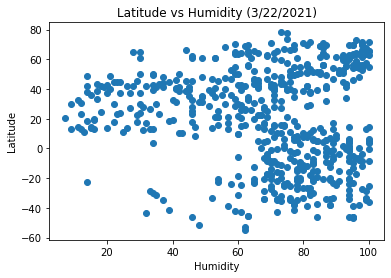

In [12]:
#Create Lat vs Humidity scatter plot
humidity_new = city_data["Humidity"] 

plt.scatter(humidity_new,lat_new)
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.title("Latitude vs Humidity (3/22/2021)")
plt.savefig("Lat_Humid.png")

print("This plot displays the relationship between humditity and latitude. This plot shows that as we move further south of the equator, the humditity increases")

This plot displays the relationship between humditity and latitude. This plot shows that latitude does not have an impact on cloudiness


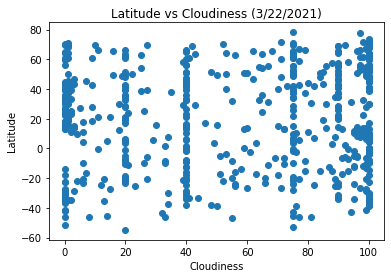

In [13]:
#Create Lat vs Cloudiness scatter plot
cloud_new = city_data["Cloudiness"]

plt.scatter(cloud_new,lat_new)
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.title("Latitude vs Cloudiness (3/22/2021)")
plt.savefig("Lat_Cloud.png")

print("This plot displays the relationship between humditity and latitude. This plot shows that latitude does not have an impact on cloudiness")

This plot displays the relationship between windspeed and latitude. This plot shows that latitude does not have an effect on windspeed 


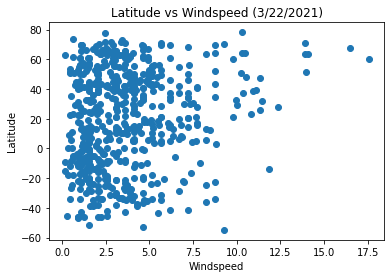

In [14]:
#Create Lat vs Wind Speed scatter plot
windspd_new = city_data["Wind Speed"]

plt.scatter(windspd_new,lat_new)
plt.ylabel("Latitude")
plt.xlabel("Windspeed")
plt.title("Latitude vs Windspeed (3/22/2021)")
plt.savefig("Lat_Wind.png")

print("This plot displays the relationship between windspeed and latitude. This plot shows that latitude does not have an effect on windspeed ")

In [15]:
#Create North and South Hempisphere dataframes
n_hemisph = city_data.loc[city_data["Latitude"] >0]
s_hemisph = city_data.loc[city_data["Latitude"] <0]

n_hemisph

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,duku,11.2361,4.9073,32.6,13,80,1.57
6,lompoc,34.6391,-120.458,13.9,63,20,7.2
9,diffa,13.3154,12.6113,31.13,9,91,3.18
10,zhezkazgan,47.8043,67.7144,-1.29,97,100,10.55
12,chalchihuites,23.4833,-103.883,22.66,12,2,10.81
...,...,...,...,...,...,...,...
632,yumen,40.2833,97.2,2.6,21,53,2.87
633,aksu,41.1231,80.2644,9.15,37,100,2.64
637,ouallam,14.3188,2.0866,31,11,0,6.1
640,impfondo,1.6381,18.0667,21,92,33,1.15


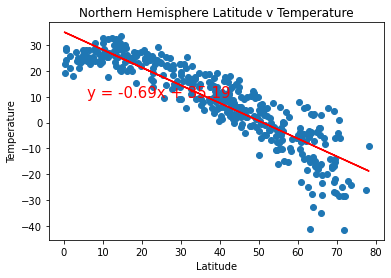

In [16]:
n_lat = n_hemisph["Latitude"]
n_temp = n_hemisph["Temperature"]

n_lat = n_lat.astype(float)
n_temp = n_temp.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(n_lat,n_temp)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere Latitude v Temperature")
plt.savefig("NHem Lat v Temp.png")


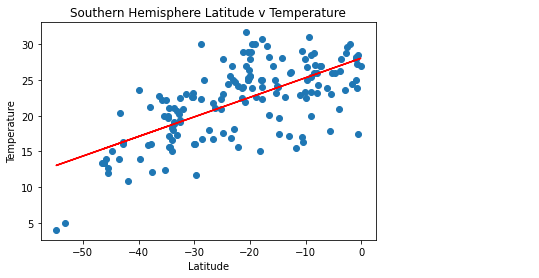

In [77]:
s_lat = s_hemisph["Latitude"]
s_temp = s_hemisph["Temperature"]

s_lat = s_lat.astype(float)
s_temp = s_temp.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(s_lat,s_temp)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere Latitude v Temperature")
plt.savefig("SHem Lat v Temp.png")
plt.show()

In [78]:
print("In the Southern Hempisphere there are more outliers in terms of temperature than in the Northern Hempisphere")

In the Southern Hempisphere there are more outliers in terms of temperature than in the Northern Hempisphere


NameError: name 'line_eq2' is not defined

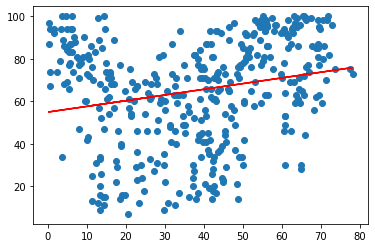

In [17]:
n_lat = n_hemisph["Latitude"]
n_humid = n_hemisph["Humidity"]

n_lat = n_lat.astype(float)
n_humid = n_humid.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_humid)
regress_values2 = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(n_lat,n_humid)
plt.plot(n_lat,regress_values2,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Humidity Latitude v Temperature")
plt.savefig("NHem Lat v Humid.png")


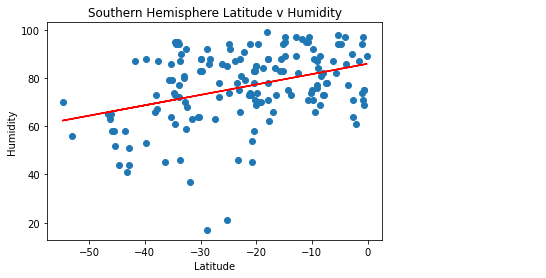

In [88]:
s_lat = s_hemisph["Latitude"]
s_humid = s_hemisph["Humidity"]

s_lat = s_lat.astype(float)
s_humid = s_humid.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_humid)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(s_lat,s_humid)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Latitude v Humidity")
plt.savefig("SHem Lat v Humid.png")
plt.show()

In [89]:
print("In the Northern Hempisphere there is a wider array of humiditiy levels. In general, latitude and humidity do not appear correlated")

In the Northern Hempisphere there is a wider array of humiditiy levels. In general, latitude and humidity do not appear correlated


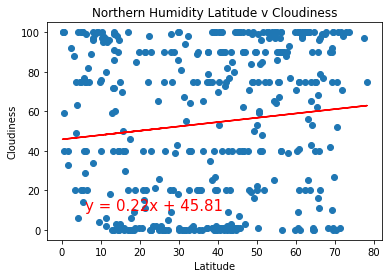

In [18]:
n_lat = n_hemisph["Latitude"]
n_cloud = n_hemisph["Cloudiness"]

n_lat = n_lat.astype(float)
n_cloud = n_cloud.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(n_lat,n_cloud)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Humidity Latitude v Cloudiness")
plt.savefig("NHem Lat v Cloud.png")
plt.show()

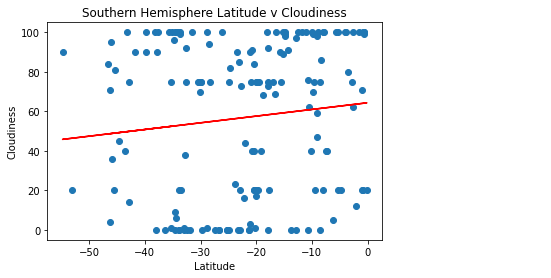

In [91]:
s_lat = s_hemisph["Latitude"]
s_cloud = s_hemisph["Cloudiness"]

s_lat = s_lat.astype(float)
s_cloud = s_cloud.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(s_lat,s_cloud)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq5,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude v Cloudiness")
plt.savefig("SHem Lat v Cloud.png")
plt.show()

In [92]:
print("Similarly to humidity, it does not appear that latitude and cloudiness are correlated. In both the Northern and Souther Hempispheres, cloudiness is widely varied")

Similarly to humidity, it does not appear that latitude and cloudiness are correlated. In both the Northern and Souther Hempispheres, cloudiness is widely varied


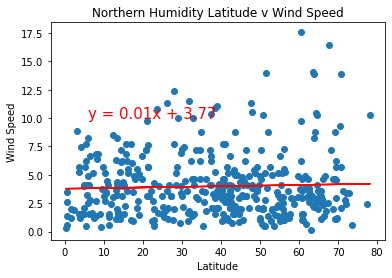

In [19]:
n_lat = n_hemisph["Latitude"]
n_windspd = n_hemisph["Wind Speed"]

n_lat = n_lat.astype(float)
n_windspd = n_windspd.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_windspd)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(n_lat,n_windspd)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Humidity Latitude v Wind Speed")
plt.savefig("NHem Lat v WindSpd.png")
plt.show()

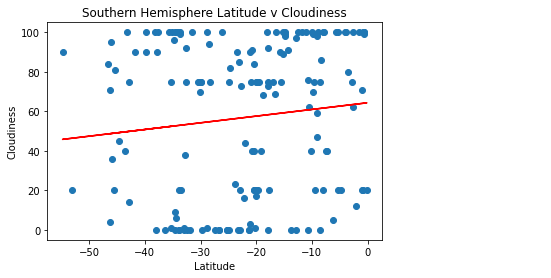

In [93]:
s_lat = s_hemisph["Latitude"]
s_wndspd = s_hemisph["Wind Speed"]

s_lat = s_lat.astype(float)
s_wndspd = s_wndspd.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(s_lat,s_cloud)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq5,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude v Cloudiness")
plt.savefig("SHem Lat v Cloud.png")
plt.show()

In [94]:
print("The average windspeed in the Northern Hemisphere trends lower than the Southern Hemisphere")

The average windspeed in the Northern Hemisphere trends lower than the Southern Hemisphere
